## MLP model to predict the next character

In [130]:
import torch
import torch.nn.functional as F 
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [154]:
len(words)

32033

In [155]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [156]:
# building the dataset
block_size = 3 # Number of characters we take to make next prediction

def buildDataSet(words):
    X, Y = [], []
    
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [157]:
import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = buildDataSet(words[:n1])
Xdev, Ydev = buildDataSet(words[n1:n2])
Xtest, Ytest = buildDataSet(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [158]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g) # Embedding 27 characters into lower dimensional space
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [159]:
for p in parameters:
    p.requires_grad = True

In [160]:
lri = []
lossi = []
stepi = []

In [175]:
for i in range(50000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # Forward Pass
    emb = C[Xtr[ix]] 
    h = torch.tanh( emb.view(-1, C.shape[1]*3) @ W1 + b1 )
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 0.01 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.0791966915130615


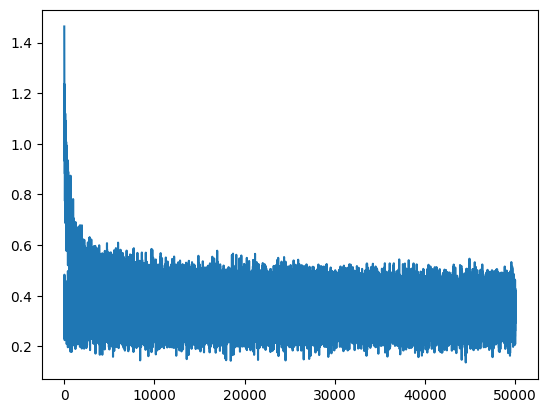

In [176]:
plt.plot(stepi, lossi)

Loss for Training Set

In [177]:
emb = C[Xtr] 
h = torch.tanh( emb.view(-1, C.shape[1]*3) @ W1 + b1 )
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print('Loss for training set: ', loss.item())

Loss for training set:  2.1747028827667236


Loss for Development Set

In [178]:
emb = C[Xdev] 
h = torch.tanh( emb.view(-1, C.shape[1]*3) @ W1 + b1 )
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print('Loss for develoment set: ', loss.item())

Loss for develoment set:  2.206343173980713


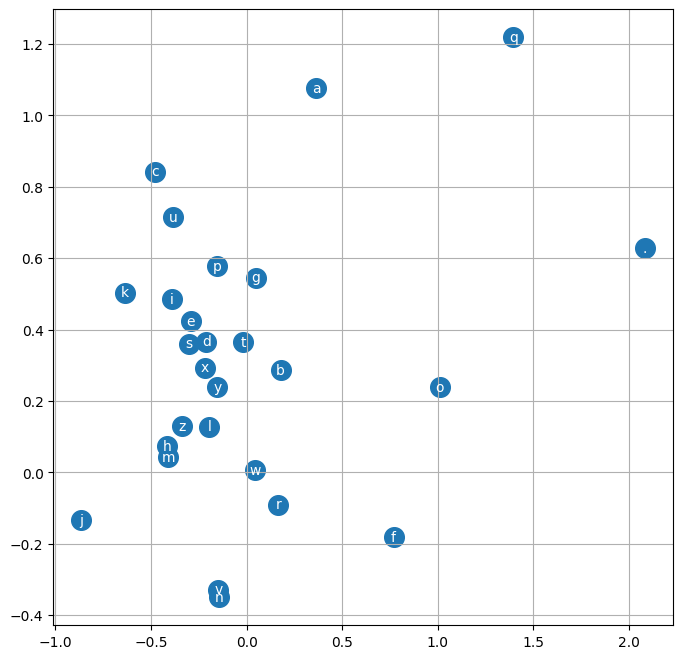

In [170]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

## Sampling

In [181]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)

        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

mora.
mayah.
seel.
nihahalarethan.
endraeg.
adee.
daeliah.
milopi.
eden.
sananar.
katelor.
kalin.
shubergshiries.
kinde.
jelionnie.
cas.
brened.
riyah.
fiel.
yuma.
